# Task 1

In [79]:
import pandas as pd
import numpy as np
import matplotlib as mp
import sklearn as sl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error as mse, r2_score as r2

%matplotlib inline
%config InlineBackend.figure_format = 'svg'


In [80]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape) 

(506, 13)


In [81]:

X = pd.DataFrame(boston.data)
X.columns = boston.feature_names
y=pd.DataFrame(boston.target)
y.columns=['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [82]:
scaler = StandardScaler()
stand_features = scaler.fit_transform(boston.data)
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)


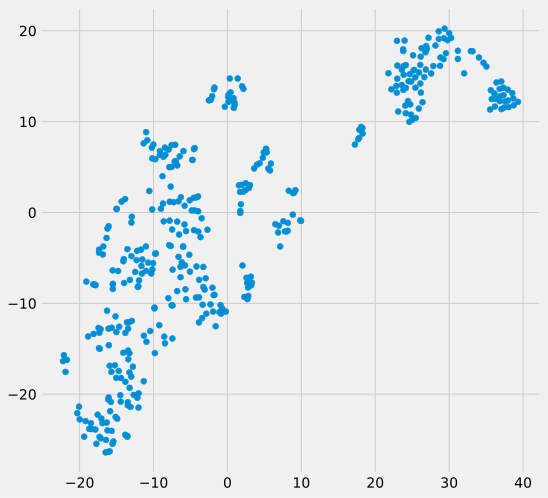

In [84]:
#n_components=2, learning_rate=250, random_state=42

from sklearn import manifold, datasets
plt.figure(figsize=(8, 8))
tsne = manifold.TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

plt.style.use('fivethirtyeight')

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()


# Task 2

In [86]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)
labels_train = kmeans.fit_predict(X_train_scaled)

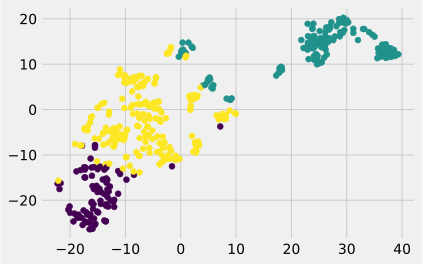

In [87]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.show()
